In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
hd = fetch_ucirepo(id=45)

hd = hd.data.original

In [4]:
hd.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,52,1,4,128,255,0,0,161,1,0.0,1,1.0,7.0,1
96,59,1,4,110,239,0,2,142,1,1.2,2,1.0,7.0,2
97,60,0,4,150,258,0,2,157,0,2.6,2,2.0,7.0,3
98,52,1,2,134,201,0,0,158,0,0.8,1,1.0,3.0,0


In [5]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [6]:
categorical = [var for var in hd.columns if hd[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


In [7]:
hd.shape

(303, 14)

In [8]:
# find numerical variables

numerical = [var for var in hd.columns if hd[var].dtype!='O' and var!='num' ]

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 13 numerical variables

The numerical variables are : ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [9]:
hd[numerical].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [10]:
hd[numerical].isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [11]:
# Separate features and target class
X = hd.drop(columns=['num'])
y = hd['num']

# Identify numerical and categorical columns
numeric_features = numerical
categorical_features = categorical

# Define preprocessing steps for numerical and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder())  # One-hot encode categorical features
])

# Combine preprocessing steps for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ],
    remainder='passthrough'  # Pass through columns not specified in transformers
)

# Apply preprocessing to the features only
X_preprocessed = preprocessor.fit_transform(X)

# Get the names of transformed columns
transformed_feature_names = list(numeric_features)

# Create a DataFrame with transformed features
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=transformed_feature_names + list(X.columns[len(transformed_feature_names):]))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42) # 80% training and 20% test

# DECISION TREE

In [13]:
from sklearn.model_selection import GridSearchCV
dt_clf = DecisionTreeClassifier()

In [14]:
# Hyper tuning for Decision Tree classifier
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,25)),
    'min_samples_leaf': list(range(1,20))
}

grid_serach_dt = GridSearchCV(estimator = dt_clf,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_serach_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [15]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_dt.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_dt.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_dt.best_estimator_))

GridSearch CV best score : 0.5911


Parameters that give the best results : 

 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 15}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=15)


In [16]:
# Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=3, min_samples_leaf=15, random_state=42)
# Train Decision Tree Classifer
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

In [17]:
print('Training set score: {:.4f}'.format(dt_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_clf.score(X_test, y_test)))

Training set score: 0.6364
Test set score: 0.5902


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=dt_clf.score(X_test,y_test)
print("\nThe accuracy of decision tree classifier dataset is "+str(round(accuracy*100,2))+"%")

[[27  0  0  2  0]
 [ 2  4  2  4  0]
 [ 2  1  4  2  0]
 [ 2  4  0  1  0]
 [ 1  2  1  0  0]]

The accuracy of decision tree classifier dataset is 59.02%


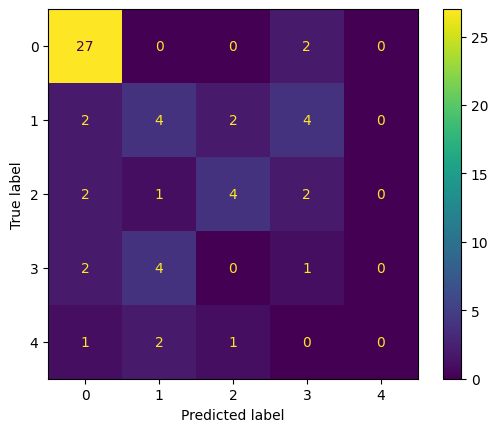

In [19]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [20]:
y_pred_lr = dt_clf.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.36      0.33      0.35        12
           2       0.57      0.44      0.50         9
           3       0.11      0.14      0.12         7
           4       0.00      0.00      0.00         4

    accuracy                           0.59        61
   macro avg       0.37      0.37      0.37        61
weighted avg       0.55      0.59      0.56        61



# NAIVE BAYES

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
nb_clf = GaussianNB()

In [23]:
# Hyper tuning for Decision Tree classifier
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_serach_nb = GridSearchCV(estimator = nb_clf,
                           param_grid = params_NB,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_serach_nb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [24]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_nb.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_nb.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_nb.best_estimator_))

GridSearch CV best score : 0.6036


Parameters that give the best results : 

 {'var_smoothing': 0.8111308307896871}


Estimator that was chosen by the search : 

 GaussianNB(var_smoothing=0.8111308307896871)


In [25]:
nb_clf = GaussianNB(var_smoothing=0.8111308307896871)
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print('Training set score: {:.4f}'.format(nb_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(nb_clf.score(X_test, y_test)))

Training set score: 0.6777
Test set score: 0.5246


In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=nb_clf.score(X_test,y_test)
print("\nThe accuracy of  Naive bayes classifier on dataset is "+str(round(accuracy*100,2))+"%")

[[27  0  1  0  1]
 [ 5  2  3  2  0]
 [ 2  1  3  3  0]
 [ 1  2  4  0  0]
 [ 0  1  1  2  0]]

The accuracy of  Naive bayes classifier on dataset is 52.46%


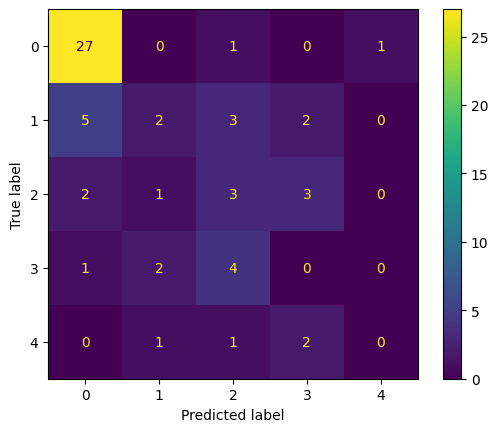

In [27]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [28]:
y_pred_lr = nb_clf.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.33      0.17      0.22        12
           2       0.25      0.33      0.29         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.52        61
   macro avg       0.27      0.29      0.27        61
weighted avg       0.47      0.52      0.49        61



# SVM(Support Vector Machine)

In [29]:
from sklearn.svm import SVC
svm_clf = SVC(C=1)

In [30]:
param_grid = [
  {'kernel':['linear']},
  {'kernel':['rbf'], 'gamma':[0.001, 0.0001]}
]

In [31]:
grid_serach_svm = GridSearchCV(estimator = svm_clf,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_serach_svm.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=SVC(C=1),
             param_grid=[{'kernel': ['linear']},
                         {'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
             scoring='accuracy', verbose=1)

In [32]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_svm.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_svm.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_svm.best_estimator_))

GridSearch CV best score : 0.5952


Parameters that give the best results : 

 {'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=1, kernel='linear')


In [33]:
svm_clf = SVC(C=1, kernel='linear')

In [34]:
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print('Training set score: {:.4f}'.format(svm_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svm_clf.score(X_test, y_test)))

Training set score: 0.7107
Test set score: 0.5574


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=svm_clf.score(X_test,y_test)
print("\nThe accuracy of SVM classifier  on  dataset is "+str(round(accuracy*100,2))+"%")

[[27  0  2  0  0]
 [ 3  3  2  4  0]
 [ 2  1  2  4  0]
 [ 1  3  1  2  0]
 [ 0  1  0  3  0]]

The accuracy of SVM classifier  on  dataset is 55.74%


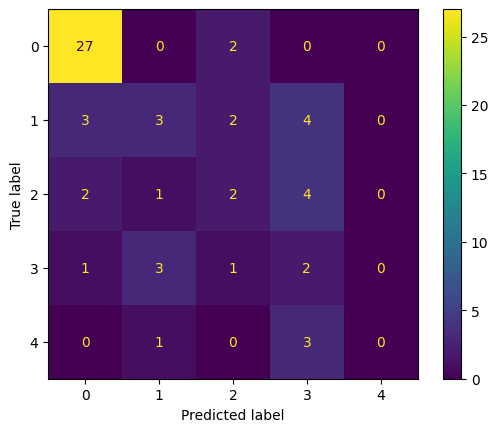

In [36]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [37]:
y_pred_lr = svm_clf.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_lr))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.38      0.25      0.30        12
           2       0.29      0.22      0.25         9
           3       0.15      0.29      0.20         7
           4       0.00      0.00      0.00         4

    accuracy                           0.56        61
   macro avg       0.33      0.34      0.32        61
weighted avg       0.52      0.56      0.53        61



# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [39]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid_serach_knn = GridSearchCV(estimator = knn_clf,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_serach_knn.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [40]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_knn.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_knn.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_knn.best_estimator_))

GridSearch CV best score : 0.6198


Parameters that give the best results : 

 {'n_neighbors': 11}


Estimator that was chosen by the search : 

 KNeighborsClassifier(n_neighbors=11)


In [41]:
knn_clf = KNeighborsClassifier(n_neighbors=11)

In [42]:
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print('Training set score: {:.4f}'.format(knn_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn_clf.score(X_test, y_test)))

Training set score: 0.6694
Test set score: 0.6066


In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=knn_clf.score(X_test,y_test)
print("\nThe accuracy of KNN classifier  on  dataset is "+str(round(accuracy*100,2))+"%")

[[28  0  1  0  0]
 [ 4  4  4  0  0]
 [ 2  2  3  2  0]
 [ 1  4  0  2  0]
 [ 1  1  2  0  0]]

The accuracy of KNN classifier  on  dataset is 60.66%


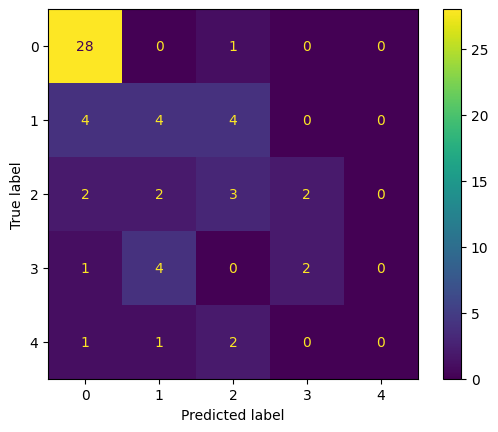

In [44]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [45]:
y_pred_lr = knn_clf.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_lr))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       0.78      0.97      0.86        29
           1       0.36      0.33      0.35        12
           2       0.30      0.33      0.32         9
           3       0.50      0.29      0.36         7
           4       0.00      0.00      0.00         4

    accuracy                           0.61        61
   macro avg       0.39      0.38      0.38        61
weighted avg       0.54      0.61      0.57        61



# CART

In [46]:
cart = DecisionTreeClassifier()

# Hyper tuning for Decision Tree classifier
params = {
    'criterion': ['gini'],
    'max_depth': list(range(1,25)),
    'min_samples_leaf': list(range(1,20))
}

grid_serach_cart = GridSearchCV(estimator = cart,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_serach_cart.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [47]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_cart.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_cart.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_cart.best_estimator_))

GridSearch CV best score : 0.5825


Parameters that give the best results : 

 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 9}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=4, min_samples_leaf=9)


In [48]:
cart = DecisionTreeClassifier(max_depth=4, min_samples_leaf=9)
cart.fit(X_train, y_train)
y_pred = cart.predict(X_test)
print('Training set score: {:.4f}'.format(cart.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(cart.score(X_test, y_test)))

Training set score: 0.6860
Test set score: 0.5574


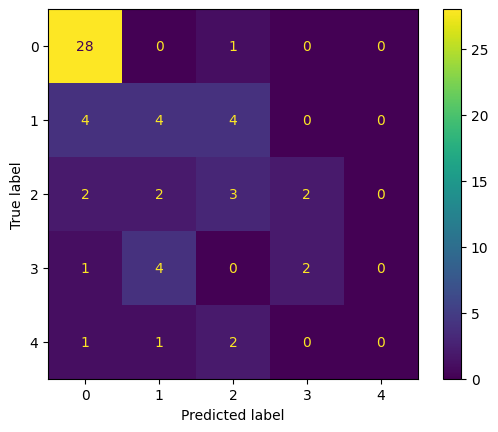

In [49]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [50]:
y_pred_lr = cart.predict(X_test)
print("CART Classifier report: \n\n", classification_report(y_test, y_pred_lr))

CART Classifier report: 

               precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.35      0.58      0.44        12
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.56        61
   macro avg       0.23      0.30      0.26        61
weighted avg       0.46      0.56      0.50        61

